In [47]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.models import Sequential
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [48]:
df = pd.read_csv("C:/Users/HP/Downloads/Neural networks/Neural networks/Alphabets_data.csv")

In [49]:
df.head(2)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10


In [50]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [51]:
df.shape

(20000, 17)

In [52]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [55]:
df.shape

(18668, 17)

In [56]:
#Checking the data types
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [57]:
#Unique values for every feature
df.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18668 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  18668 non-null  object
 1   xbox    18668 non-null  int64 
 2   ybox    18668 non-null  int64 
 3   width   18668 non-null  int64 
 4   height  18668 non-null  int64 
 5   onpix   18668 non-null  int64 
 6   xbar    18668 non-null  int64 
 7   ybar    18668 non-null  int64 
 8   x2bar   18668 non-null  int64 
 9   y2bar   18668 non-null  int64 
 10  xybar   18668 non-null  int64 
 11  x2ybar  18668 non-null  int64 
 12  xy2bar  18668 non-null  int64 
 13  xedge   18668 non-null  int64 
 14  xedgey  18668 non-null  int64 
 15  yedge   18668 non-null  int64 
 16  yedgex  18668 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,18668.0,4.150793,1.879428,0.0,3.0,4.0,5.0,15.0
ybox,18668.0,7.244322,3.187660,0.0,5.0,8.0,10.0,15.0
width,18668.0,5.279891,1.934960,0.0,4.0,5.0,6.0,15.0
height,18668.0,5.506910,2.178292,0.0,4.0,6.0,7.0,15.0
onpix,18668.0,3.660596,2.160555,0.0,2.0,3.0,5.0,15.0
xbar,18668.0,6.919381,2.032226,0.0,6.0,7.0,8.0,15.0
ybar,18668.0,7.529409,2.319834,0.0,6.0,7.0,9.0,15.0
x2bar,18668.0,4.584637,2.625714,0.0,3.0,4.0,6.0,15.0
y2bar,18668.0,5.201361,2.320102,0.0,4.0,5.0,7.0,15.0
xybar,18668.0,8.353171,2.468905,0.0,7.0,8.0,10.0,15.0


In [60]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex'],
      dtype='object')

+ ###  Univariate plots

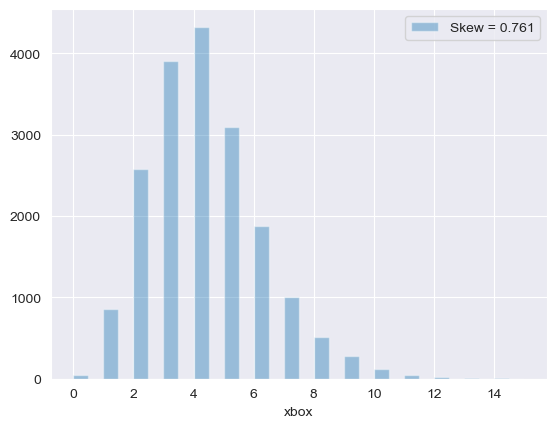

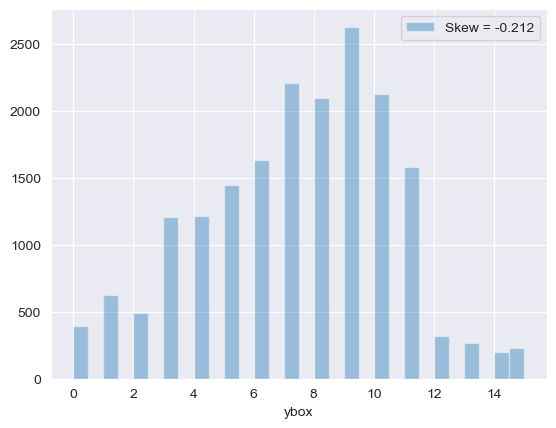

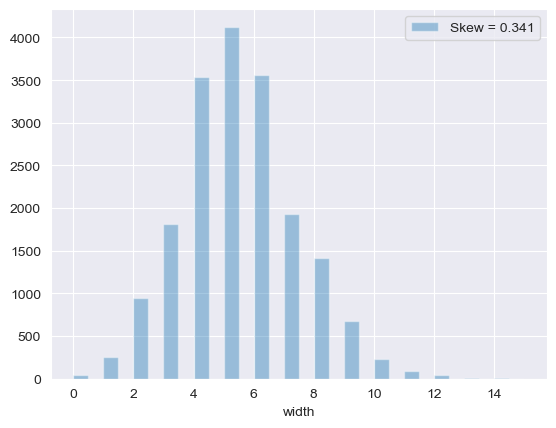

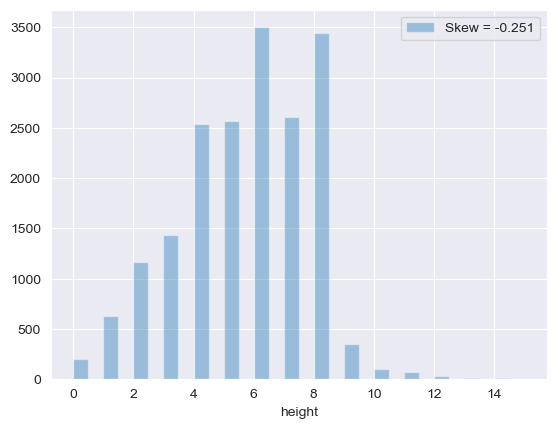

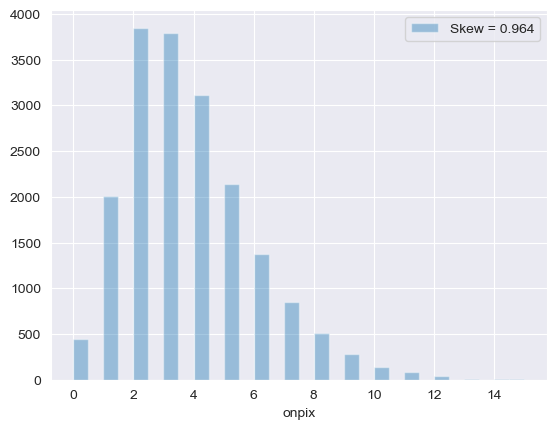

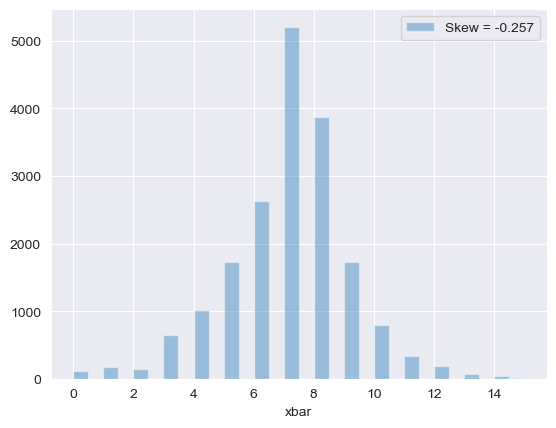

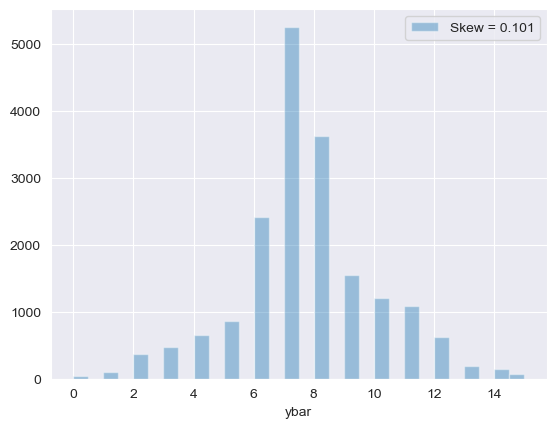

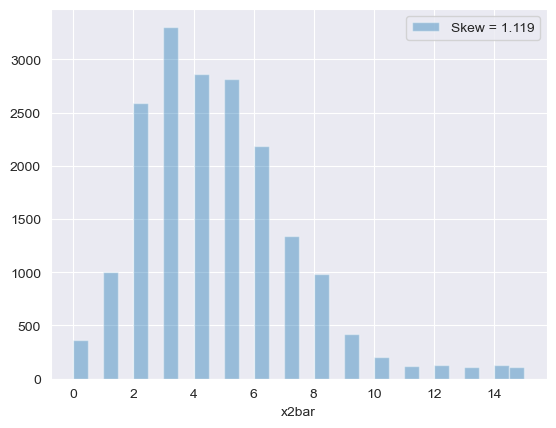

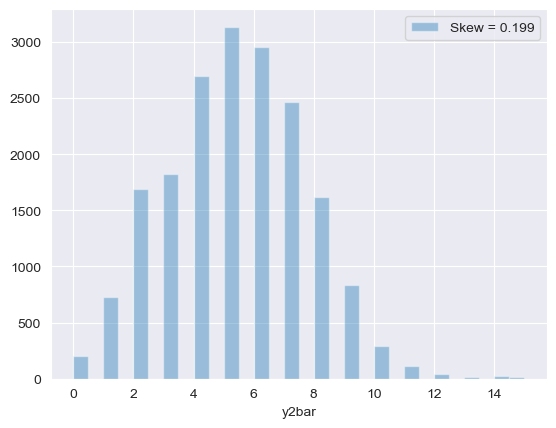

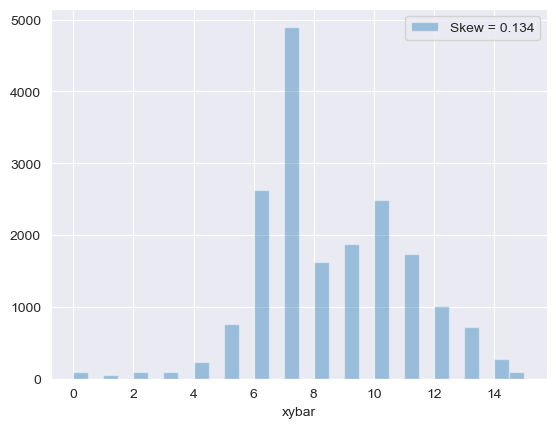

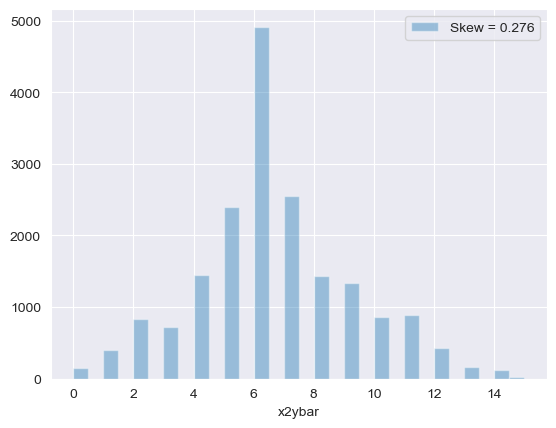

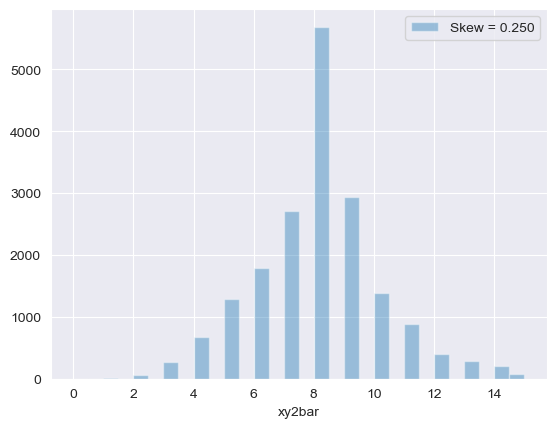

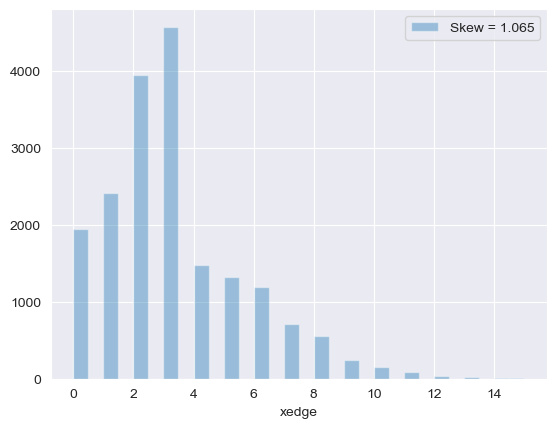

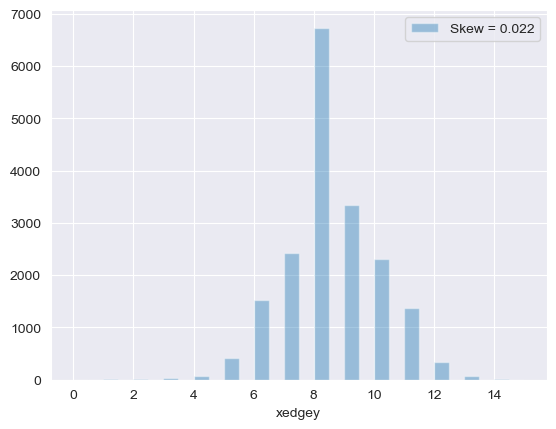

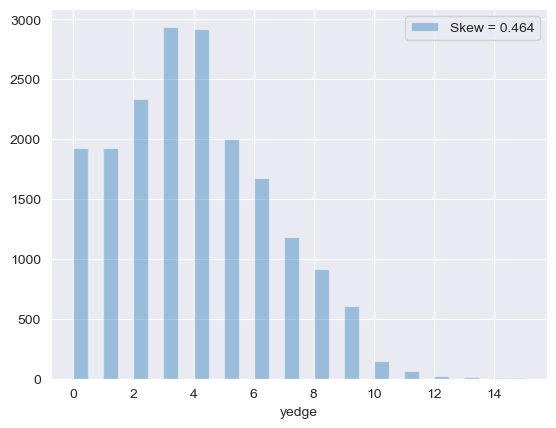

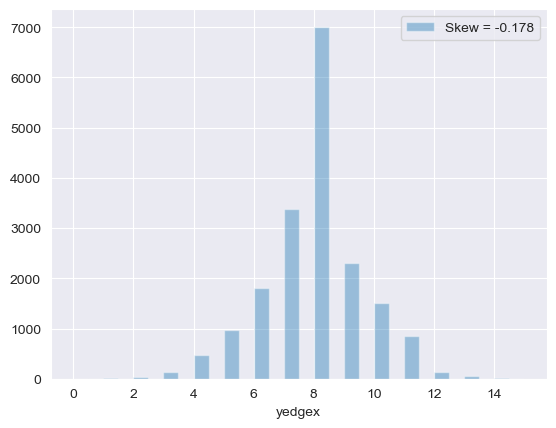

In [61]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [62]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 594 observations with more than 2 outliers


In [63]:
numerical_features

['xbox',
 'ybox',
 'width',
 'height',
 'onpix',
 'xbar',
 'ybar',
 'x2bar',
 'y2bar',
 'xybar',
 'x2ybar',
 'xy2bar',
 'xedge',
 'xedgey',
 'yedge',
 'yedgex']

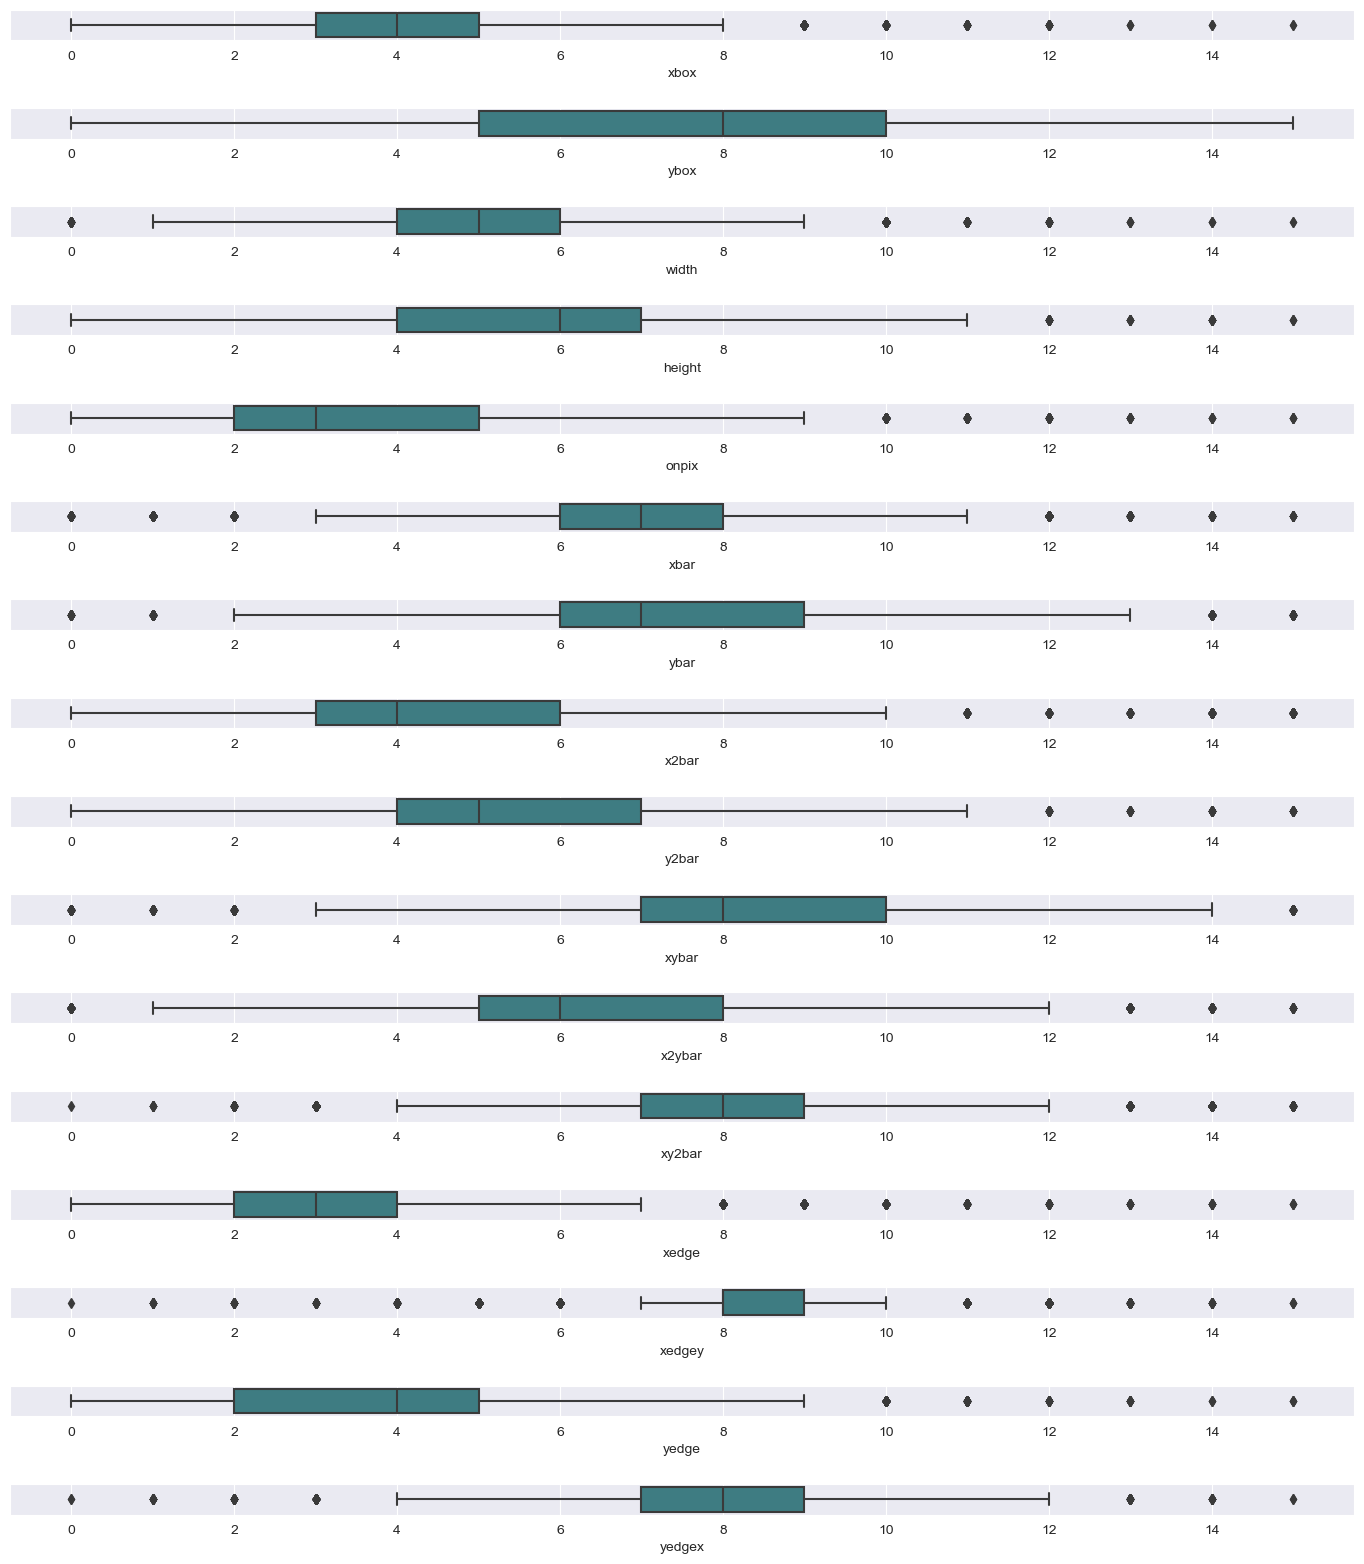

In [64]:
ot=df.copy() 
fig, axes=plt.subplots(16,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='xbox',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='ybox',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='width',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='height',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='onpix',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='xbar',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='ybar',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='x2bar',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='y2bar',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='xybar',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='x2ybar',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='xy2bar',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='xedge',data=ot,palette='crest',ax=axes[12])
sns.boxplot(x='xedgey',data=ot,palette='crest',ax=axes[13])
sns.boxplot(x='yedge',data=ot,palette='crest',ax=axes[14])
sns.boxplot(x='yedgex',data=ot,palette='crest',ax=axes[15])
plt.tight_layout(pad=2.0)

<Axes: >

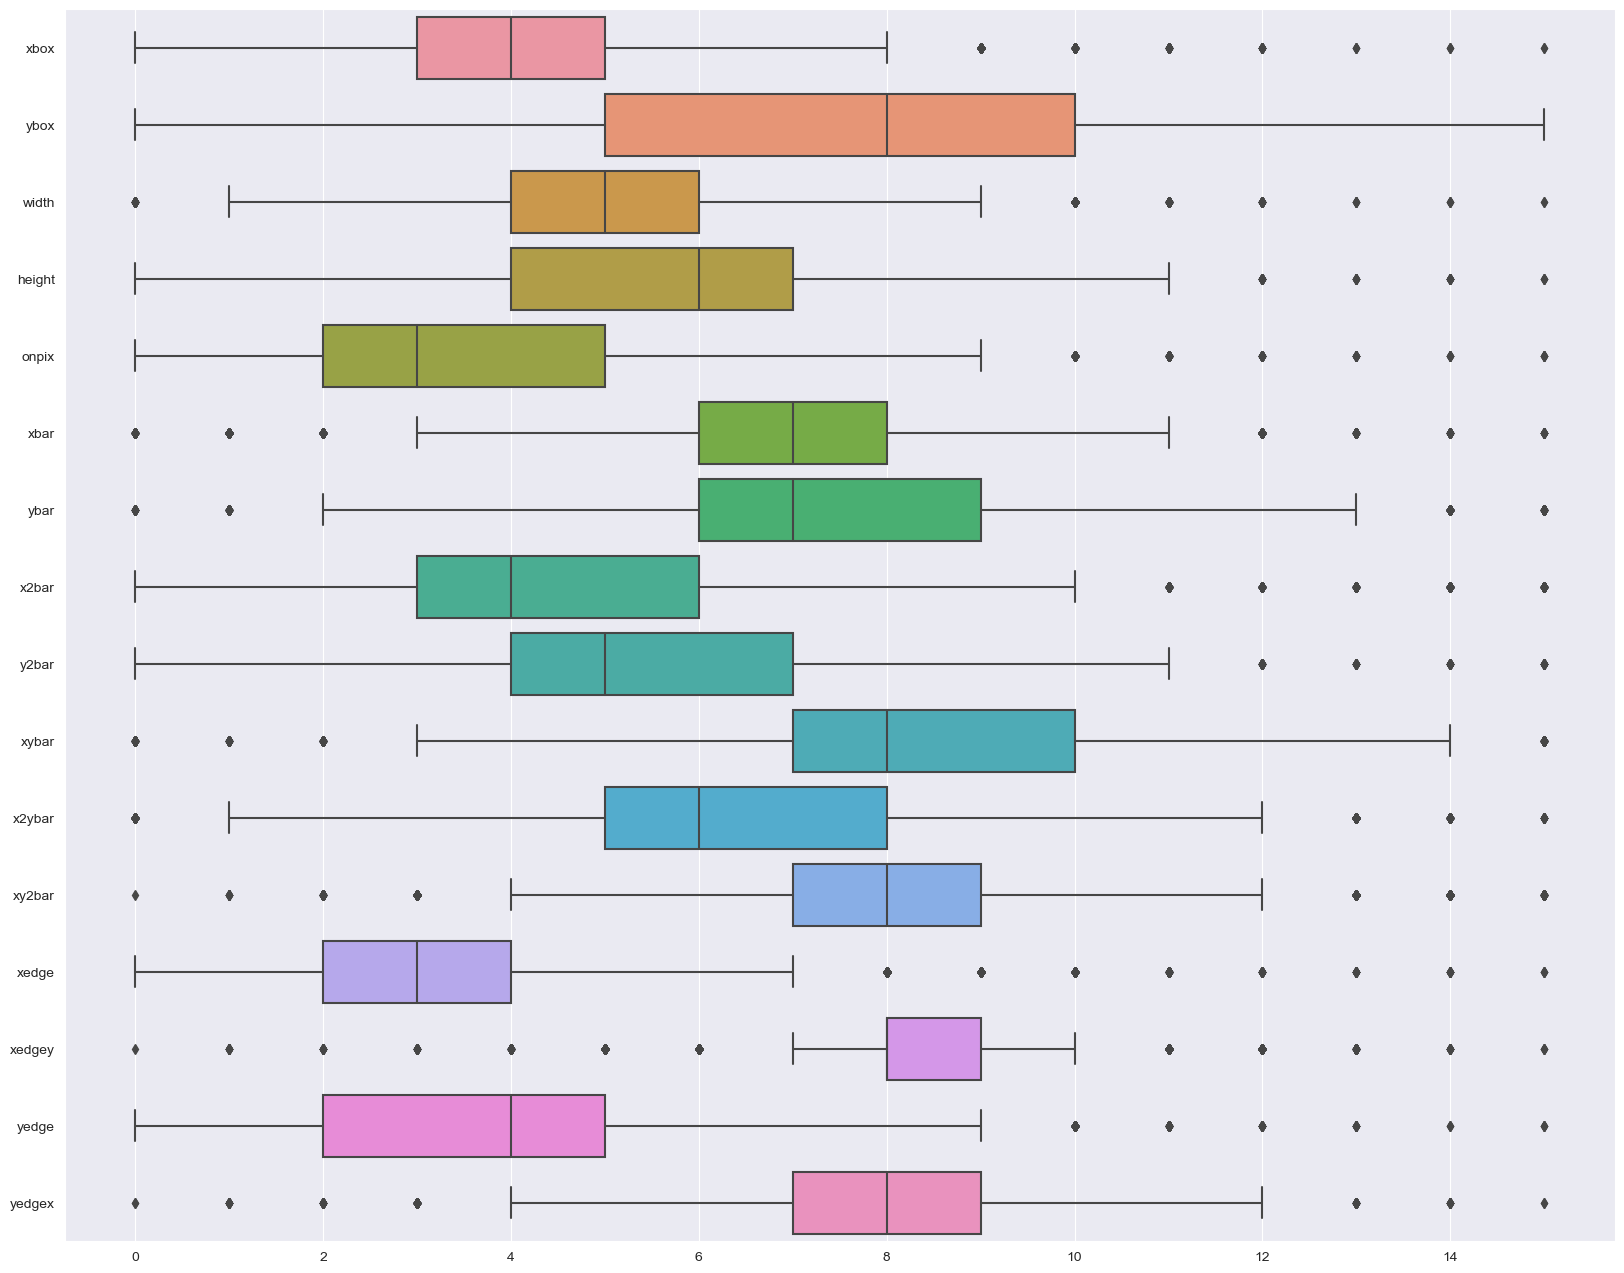

In [65]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

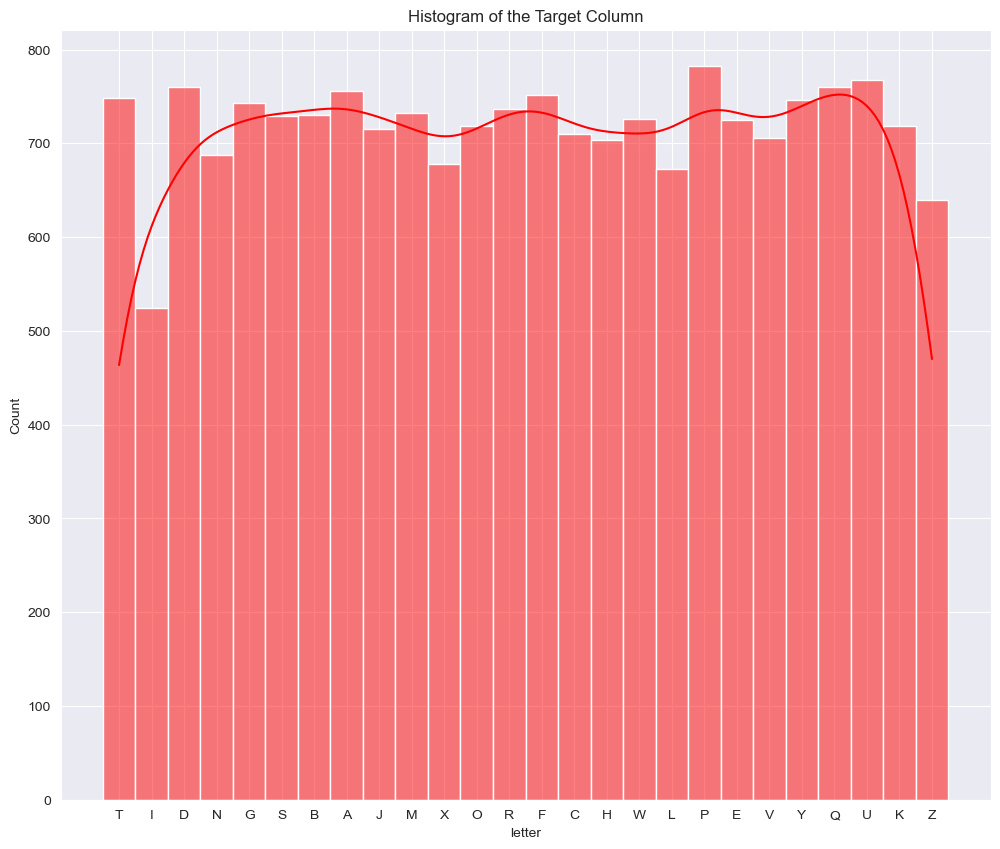

In [66]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="letter",color="red",kde=True)
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

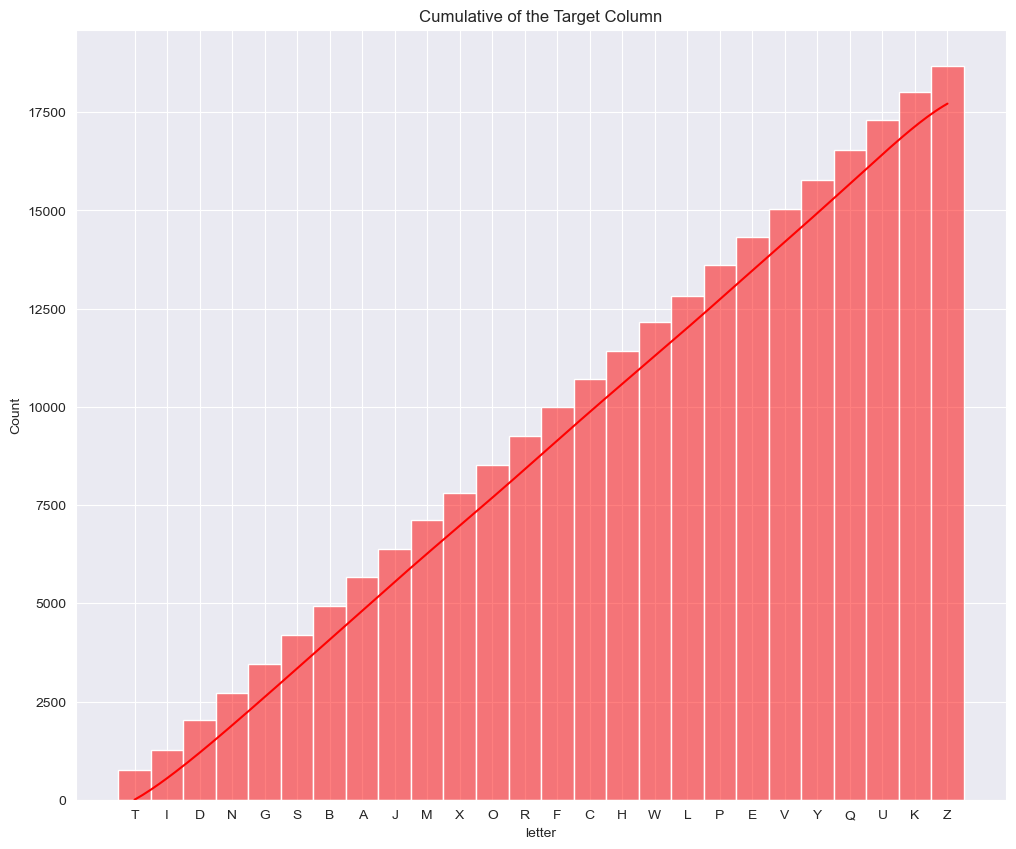

In [67]:
plt.figure(figsize = (12,10))
sns.histplot(df["letter"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

+ ### Multivariate Analysis
Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Axes: >

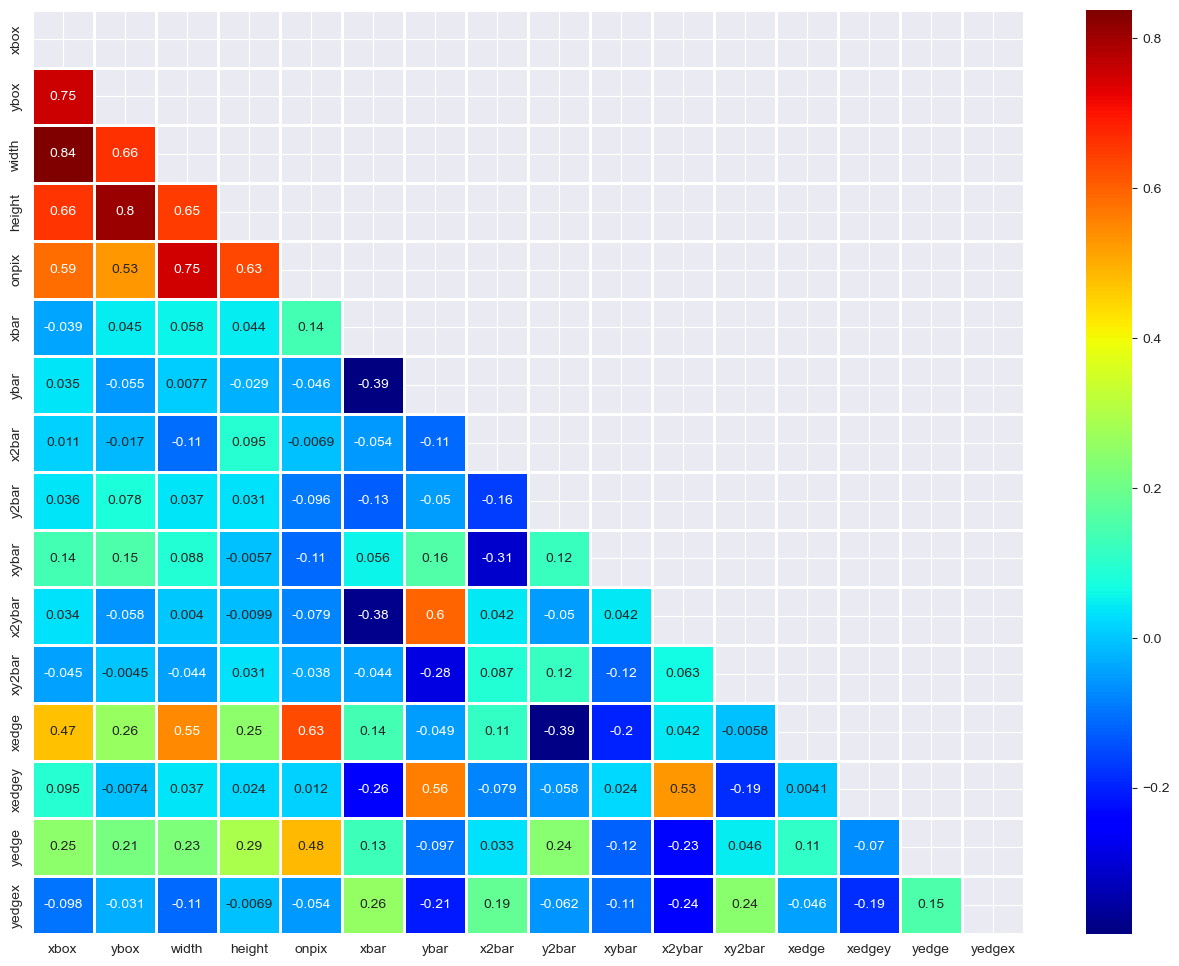

In [68]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

### Feature Selection Technique

In [69]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [70]:
x = df.drop('letter', axis=1)
y = df[["letter"]]

In [71]:
# Initialize SelectKBest with mutual_info_classif for categorical target
test = SelectKBest(score_func=mutual_info_classif, k='all')
fit = test.fit(x, y)

# Print scores or use them for further analysis
print(fit.scores_)


[4.02695979e-02 3.00497379e-04 7.60659916e-02 2.42136772e-02
 6.57470256e-02 2.54800308e-01 4.43243860e-01 3.04980238e-01
 3.78335870e-01 2.47739832e-01 4.80154928e-01 4.35696402e-01
 3.98333032e-01 4.26910180e-01 3.55104525e-01 2.24320075e-01]


In [72]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [73]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
10,0.480155,x2ybar
6,0.443244,ybar
11,0.435696,xy2bar
13,0.426910,xedgey
12,0.398333,xedge
8,0.378336,y2bar
14,0.355105,yedge
7,0.304980,x2bar
5,0.254800,xbar
9,0.247740,xybar


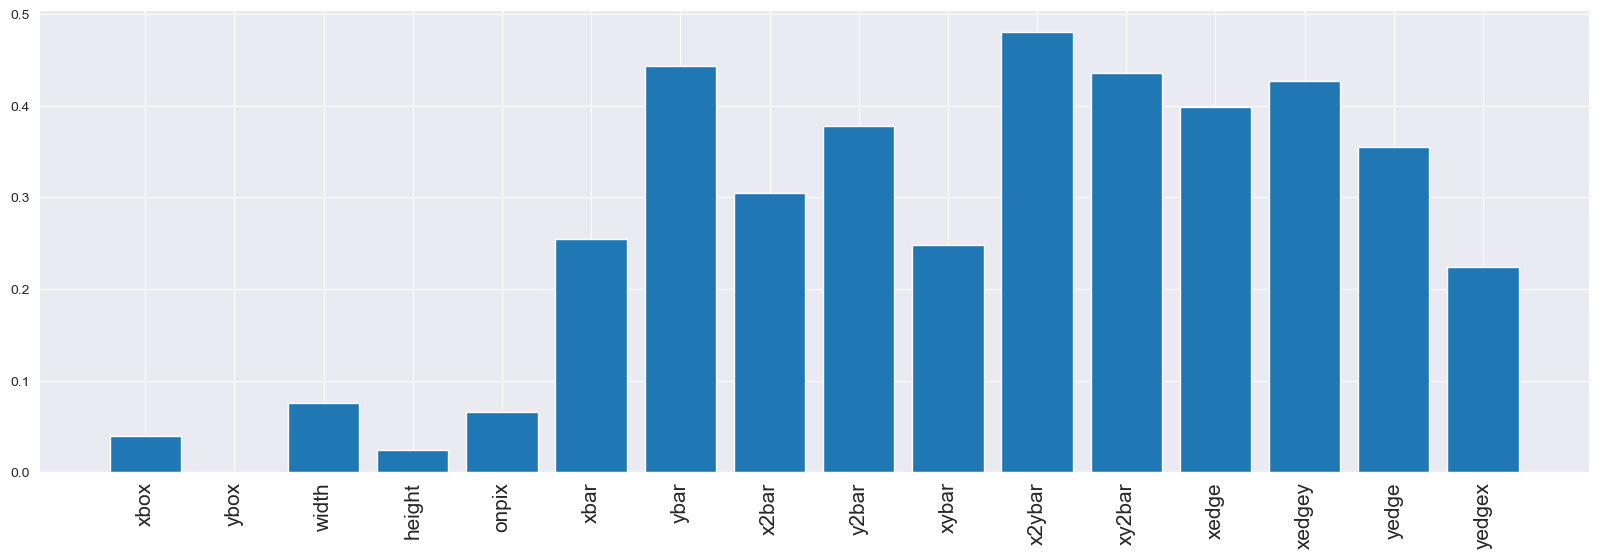

In [74]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

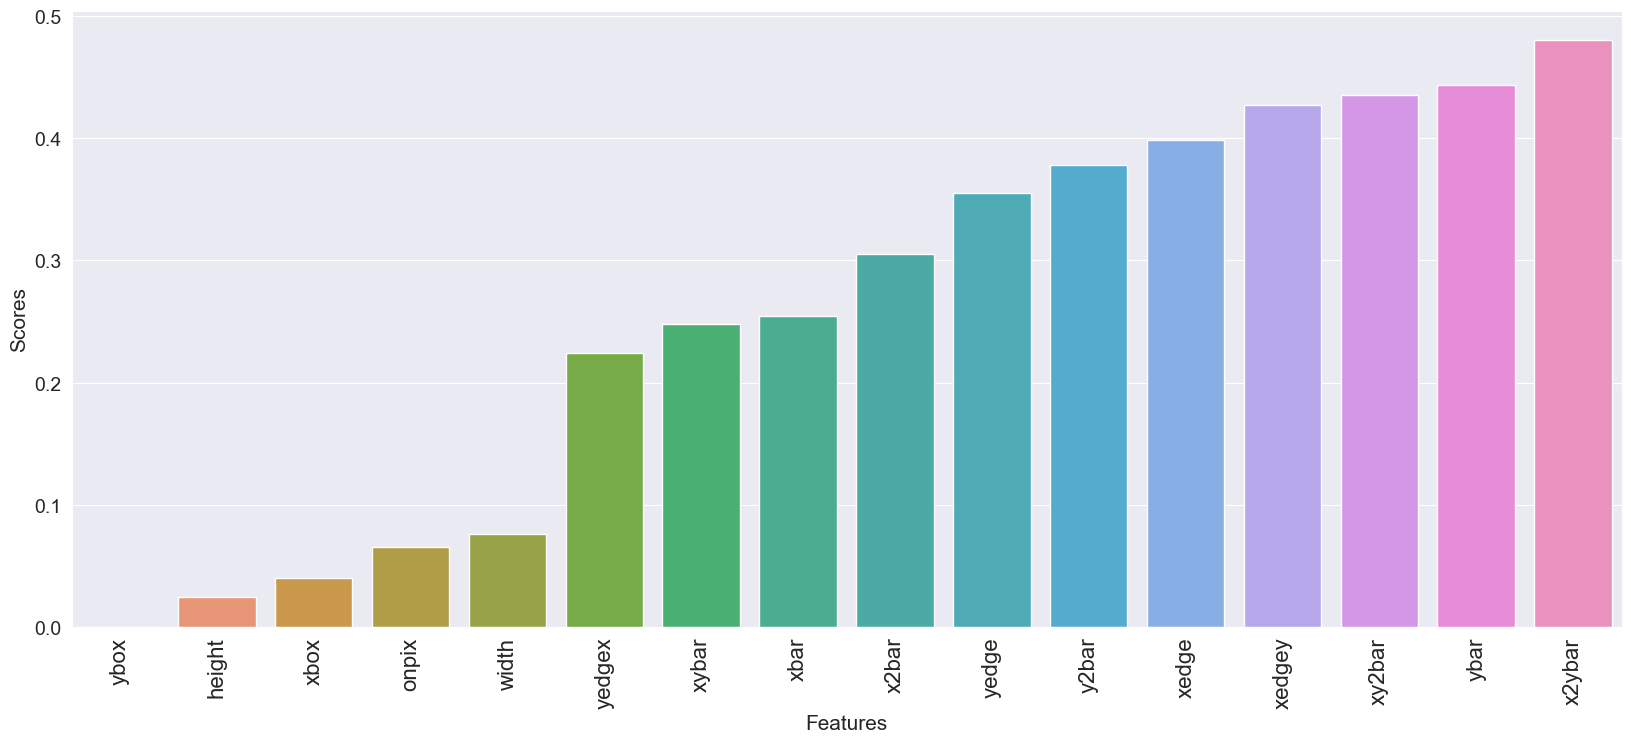

In [75]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.show()

In [76]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
10,0.480155,x2ybar
6,0.443244,ybar
11,0.435696,xy2bar
13,0.426910,xedgey
12,0.398333,xedge
8,0.378336,y2bar
14,0.355105,yedge
7,0.304980,x2bar
5,0.254800,xbar
9,0.247740,xybar


In [77]:
model_data = df[['x2ybar', 'ybar','xy2bar', 'xedgey', 'xedge', 'y2bar', 'yedge',"letter"]]
model_data.head()

,x2ybar,ybar,xy2bar,xedgey,xedge,y2bar,yedge,letter
0,10,13,8,8,0,6,0,T
1,3,5,9,8,2,4,4,I
2,3,6,7,7,3,6,3,D
3,4,9,10,10,6,6,2,N
4,5,6,9,7,1,6,5,G


In [78]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [79]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,x2ybar,ybar,xy2bar,xedgey,xedge,y2bar,yedge,letter
0,1.351557,2.358246,0.035798,-0.223412,-1.347535,0.344235,-1.494712,T
1,-1.315513,-1.090370,0.510429,-0.223412,-0.486890,-0.517819,0.079965,I
2,-1.315513,-0.659293,-0.438833,-0.858409,-0.056568,0.344235,-0.313704,D
3,-0.934503,0.633938,0.985060,1.046582,1.234399,0.344235,-0.707373,N
4,-0.553493,-0.659293,0.510429,-0.858409,-0.917213,0.344235,0.473635,G


In [81]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 x2ybar    0.0
ybar     -0.0
xy2bar   -0.0
xedgey   -0.0
xedge     0.0
y2bar     0.0
yedge     0.0
dtype: float64 
Standard Devaition 
 x2ybar    1.0
ybar      1.0
xy2bar    1.0
xedgey    1.0
xedge     1.0
y2bar     1.0
yedge     1.0
dtype: float64 1


In [82]:
x = df_standard_scaled.drop('letter',axis=1)
y = df_standard_scaled[['letter']]

In [83]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

### Model Building Neural Networks
#### Standardizing only predictor variable - after train test split

In [84]:
model_data

,x2ybar,ybar,xy2bar,xedgey,xedge,y2bar,yedge,letter
0,10,13,8,8,0,6,0,T
1,3,5,9,8,2,4,4,I
2,3,6,7,7,3,6,3,D
3,4,9,10,10,6,6,2,N
4,5,6,9,7,1,6,5,G
...,...,...,...,...,...,...,...,...
19994,7,9,8,10,3,8,8,T
19995,6,7,4,8,2,6,3,D
19996,9,8,13,9,2,9,3,C
19997,9,11,5,12,2,7,2,T


In [85]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('letter', axis=1)
y = model_data[["letter"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(14934, 7)
(3734, 7)
(14934, 1)
(3734, 1)


In [86]:
X = df.drop(columns=['letter'])
y = df['letter']

# Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check shapes
print("Shape of X:", X.shape)
print("Shape of y_encoded:", y_encoded.shape)

# Split the data into training and test sets (if not already done)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Normalize/Scale the features (if not already done)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Check shapes again after splitting
print("Shape of x_train_scaled:", x_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# Ensure the y_train has the same number of samples as x_train_scaled
if x_train_scaled.shape[0] == y_train.shape[0]:
    print("Shapes are consistent. Proceeding with model training.")
else:
    raise ValueError("Mismatch in number of samples between x_train_scaled and y_train.")

# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=50, activation='relu', kernel_initializer='normal', input_dim=x_train_scaled.shape[1]))  # input layer
model.add(Dense(units=20, activation='tanh', kernel_initializer='normal'))  # hidden layer
model.add(Dense(units=1, kernel_initializer='normal'))  # output layer

model.compile(optimizer="adam", loss="mse", metrics=["mae", "mse"])

# Fit the model
model.fit(x_train_scaled, y_train, batch_size=50, validation_split=0.3, epochs=100, verbose=1)


Shape of X: (18668, 16)
Shape of y_encoded: (18668,)
Shape of x_train_scaled: (13067, 16)
Shape of y_train: (13067,)
Shapes are consistent. Proceeding with model training.
Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 189.3026 - mae: 11.6433 - mse: 189.3026 - val_loss: 107.5273 - val_mae: 8.5124 - val_mse: 107.5273
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.1544 - mae: 8.0693 - mse: 96.1544 - val_loss: 72.2989 - val_mae: 7.1908 - val_mse: 72.2989
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.3968 - mae: 6.9978 - mse: 68.3968 - val_loss: 60.1744 - val_mae: 6.6865 - val_mse: 60.1744
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.4223 - mae: 6.6495 - mse: 59.4223 - val_loss: 49.9553 - val_mae: 5.9795 - val_mse: 49.9553
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.6529 - mae: 5.8856 - mse: 48.6529 - val_loss: 44.6818 - val_mae: 5.5673 - val_mse: 44.6818
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3566 - mae: 2.2745 - mse: 10.3566 - val_loss: 12.5145 - val_mae: 2.4844 - val_mse: 12.5145
Epoch 44/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9931 - mae: 2.2437 - mse: 9.9931 - val_loss: 12.3917 - val_mae: 2.4524 - val_mse: 12.3917
Epoch 45/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.3362 - mae: 2.2645 - mse: 10.3362 - val_loss: 12.1671 - val_mae: 2.4223 - val_mse: 12.1671
Epoch 46/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.1733 - mae: 2.2460 - mse: 10.1733 - val_loss: 12.1296 - val_mae: 2.4197 - val_mse: 12.1296
Epoch 47/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7487 - mae: 2.2035 - mse: 9.7487 - val_loss: 12.2145 - val_mae: 2.4252 - val_mse: 12.2145
Epoch 48/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.0242 - mae: 2.2165 - mse: 10.0242 - val_loss: 11.9567 - val_mae: 2.3830 - val_mse: 11.9567
Epoch 49/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7818 - mae: 2.188

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9411 - mae: 1.8156 - mse: 6.9411 - val_loss: 9.7231 - val_mae: 2.0943 - val_mse: 9.7231
Epoch 87/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6181 - mae: 1.7754 - mse: 6.6181 - val_loss: 9.7928 - val_mae: 2.1252 - val_mse: 9.7928
Epoch 88/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0834 - mae: 1.8340 - mse: 7.0834 - val_loss: 9.7091 - val_mae: 2.0915 - val_mse: 9.7091
Epoch 89/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7401 - mae: 1.7871 - mse: 6.7401 - val_loss: 9.7061 - val_mae: 2.0876 - val_mse: 9.7061
Epoch 90/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6774 - mae: 1.7794 - mse: 6.6774 - val_loss: 9.5438 - val_mae: 2.0751 - val_mse: 9.5438
Epoch 91/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9818 - mae: 1.8065 - mse: 6.9818 - val_loss: 9.5523 - val_mae: 2.0640 - val_mse: 9.5523
Epoch 92/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6621 - mae: 1.7732 - mse: 6.6621 - va

In [87]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
batch_size: 5 - epochs: 5 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
batch_size: 5 - epochs: 50 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
batch_size: 5 - epochs: 100 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
batch_size: 10 - epochs: 5 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
batch_size: 10 - epochs: 50 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
batch_size: 10 - epochs: 100 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
batch_size: 15 - epochs: 5 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
batch_size: 15 - epochs: 10 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
batch_size: 15 - epochs: 50 Accuracy: -inf
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
batch_size: 15 - epochs:

,batchsize,epochs,Accuracy
0,5,5,-inf
0,5,10,-inf
0,5,50,-inf
0,5,100,-inf
0,10,5,-inf
0,10,10,-inf
0,10,50,-inf
0,10,100,-inf
0,15,5,-inf
0,15,10,-inf


In [88]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParamTable = finalParamTable.reset_index()
#print(finalParamTable_1)
#print(finalParamTable['Accuracy'].idxmax())
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

index        0.0
batchsize    5.0
epochs       5.0
Accuracy    -inf
Name: 0, dtype: float64

In [89]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

In [90]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

### Predicting values from Model using same dataset

In [92]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step
(5601, 18)


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Actual,Predicted
10121,3,4,5,3,3,7,11,2,2,6,9,8,6,11,0,8,22,22.276098
18207,9,14,8,8,5,7,5,4,9,10,4,9,3,7,9,9,16,16.227600
4422,3,4,4,3,2,5,12,3,6,11,9,4,1,11,1,5,19,19.561224
5545,4,10,7,8,8,10,6,2,4,8,4,4,3,8,5,7,8,7.840979
13070,2,3,3,2,2,9,6,3,5,10,4,7,2,8,2,8,3,3.111869
8522,5,9,5,6,5,5,7,8,6,5,4,6,3,8,4,9,3,6.546629
19258,2,2,3,3,2,7,9,5,4,7,6,6,4,9,1,6,13,12.812788
15133,7,11,9,8,7,7,7,5,6,7,6,8,7,8,3,7,3,6.686781
8605,6,11,6,6,4,11,2,4,2,11,4,12,5,3,5,11,0,0.470934
12701,2,3,3,2,1,6,8,7,7,8,7,12,1,9,4,10,2,1.499289


### Calculating Absolute Percent Error and Error

In [93]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  -inf


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Actual,Predicted,APE %
10121,3,4,5,3,3,7,11,2,2,6,9,8,6,11,0,8,22,22.276098,1.254992
18207,9,14,8,8,5,7,5,4,9,10,4,9,3,7,9,9,16,16.227600,1.422501
4422,3,4,4,3,2,5,12,3,6,11,9,4,1,11,1,5,19,19.561224,2.953810
5545,4,10,7,8,8,10,6,2,4,8,4,4,3,8,5,7,8,7.840979,1.987767
13070,2,3,3,2,2,9,6,3,5,10,4,7,2,8,2,8,3,3.111869,3.728970


In [94]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Actual,Predicted,APE %,Error
0,3,4,5,3,3,7,11,2,2,6,9,8,6,11,0,8,22,22.276098,1.254992,-0.012550
1,9,14,8,8,5,7,5,4,9,10,4,9,3,7,9,9,16,16.227600,1.422501,-0.014225
2,3,4,4,3,2,5,12,3,6,11,9,4,1,11,1,5,19,19.561224,2.953810,-0.029538
3,4,10,7,8,8,10,6,2,4,8,4,4,3,8,5,7,8,7.840979,1.987767,0.019878
4,2,3,3,2,2,9,6,3,5,10,4,7,2,8,2,8,3,3.111869,3.728970,-0.037290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,6,12,6,6,5,9,4,5,3,10,5,12,7,3,6,11,0,3.682284,inf,-inf
5597,3,8,3,5,2,3,14,7,2,12,7,3,0,10,3,8,15,15.203690,1.357931,-0.013579
5598,5,11,5,8,3,6,7,11,10,7,6,6,3,8,4,8,3,5.717296,90.576522,-0.905765
5599,3,4,4,3,2,4,8,4,6,11,10,12,1,9,2,7,2,2.940498,47.024882,-0.470249


### Visualizing the Relationship between the Actual and Predicted ValuesModel Validation

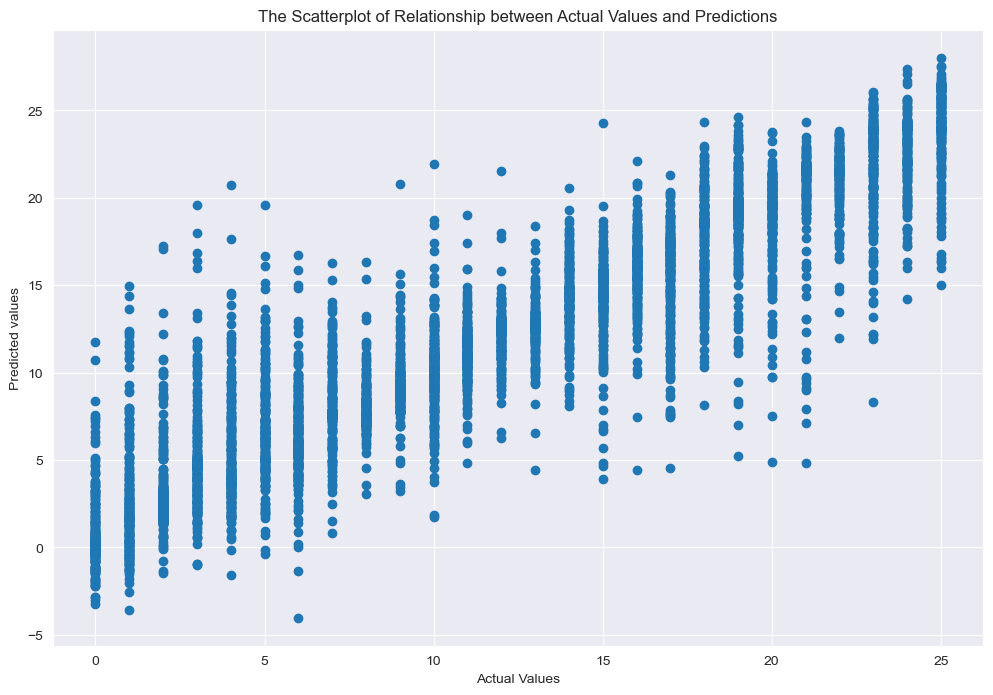

In [95]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [96]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 1.7778996635900823
MSE: 7.516206488828866
RMSE: 2.74157007731498


In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
R2_score (train):  0.9365319706026676
R2_score (test):  0.8675491192663363


In [100]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict % 86.79 of the target correctly


### Residual Analysis

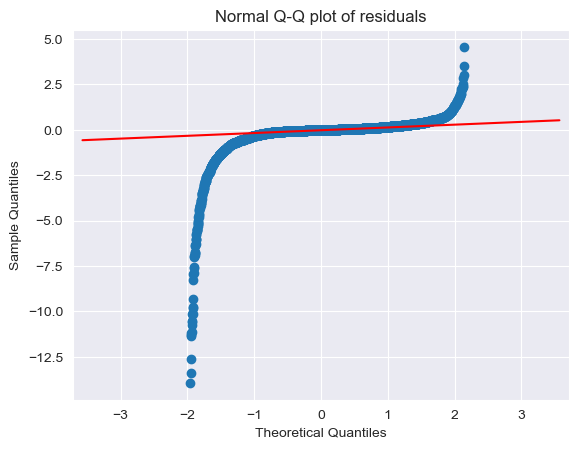

In [101]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()